In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import chainer
from chainer import Chain, Variable
from net import NeuralProcesses

In [2]:
# Parameters
n_h = 3
n_r = 3
n_z = 3
gpu = None

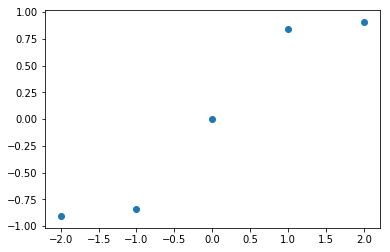

In [3]:
x = np.array([[-2,-1,0,1,2]]).astype(np.float32).T
y = np.sin(x).astype(np.float32)
plt.scatter(x,np.sin(x))

### Training

In [5]:
# construct model and ship to GPU
model = NeuralProcesses(1,1, n_h, n_r, n_z,'sigmoid')

# set up the optimizer
opt = chainer.optimizers.Adam()
opt.setup(model)

In [6]:
posteriors = []
x_pred = Variable(np.linspace(-4,4,200).astype(np.float32)[:,np.newaxis])
for epoch in range(3000):
    # fetch the next batch of data
    idx = np.random.choice([0,1,2,3,4],np.random.randint(low=1,high=5),replace=False)
    xb_target = Variable(x[idx,:])
    xb_context = Variable(np.delete(x,idx)[:,np.newaxis])
    yb_target = Variable(y[idx,:])
    yb_context = Variable(np.delete(y,idx)[:,np.newaxis])

    # forwad
    rec_loss, kl = model.train(xb_context,yb_context,xb_target,yb_target)

    # evaluate the binary cross entropy loss
    loss = (rec_loss + kl)
    lossf = loss.data

    # backward/update
    model.cleargrads()
    loss.backward()
    opt.update()
    if epoch % 100 == 0:
        print("epoch %d : loss: %f" % (epoch, lossf))
        dec_mu, dec_ln_var = model.posterior(Variable(x), Variable(y), x_pred, n_draws=50)
        posteriors.append(dec_mu)

epoch 0 : loss: 1.999140
epoch 100 : loss: 2.665526
epoch 200 : loss: 0.788772
epoch 300 : loss: 3.609197
epoch 400 : loss: 3.605253
epoch 500 : loss: 2.340187
epoch 600 : loss: 1.792789
epoch 700 : loss: 1.949678
epoch 800 : loss: 0.069095
epoch 900 : loss: -0.402128
epoch 1000 : loss: 1.398178
epoch 1100 : loss: 0.501145
epoch 1200 : loss: 0.445903
epoch 1300 : loss: 0.484761
epoch 1400 : loss: -0.569161
epoch 1500 : loss: -0.623341
epoch 1600 : loss: -1.773161
epoch 1700 : loss: -3.837838
epoch 1800 : loss: -1.251587
epoch 1900 : loss: -2.017208
epoch 2000 : loss: -4.354425
epoch 2100 : loss: -4.986829
epoch 2200 : loss: -1.962785
epoch 2300 : loss: -8.627047
epoch 2400 : loss: -2.199856
epoch 2500 : loss: -1.513340
epoch 2600 : loss: -6.162578
epoch 2700 : loss: -3.643122
epoch 2800 : loss: -6.886958
epoch 2900 : loss: -10.428596


### Plot

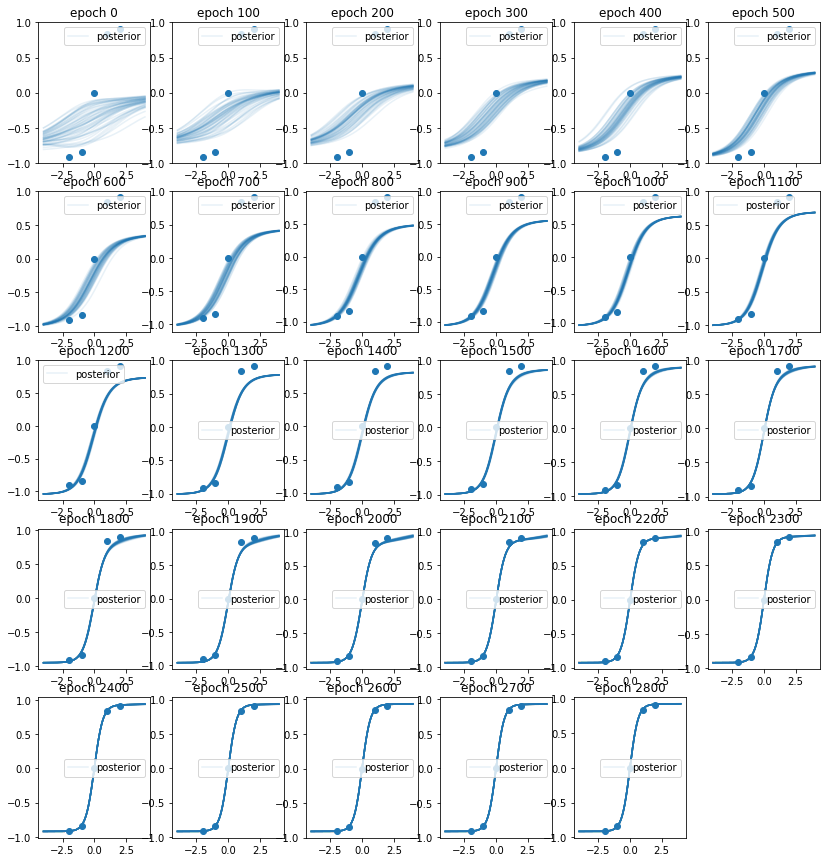

In [8]:
plt.figure(figsize=(14, 15))
for fig in range(1,len(posteriors)):
    plt.subplot(5,6,fig)
    for i, pos in enumerate(posteriors[fig]):
        label = None
        if i == 0:
            label = "posterior"
        plt.plot(x_pred.data, pos.data.T, label=label, alpha=.1,color="C0")
    plt.plot(x, y, "o")
    plt.title("epoch " + str(100*(fig-1)))

    plt.legend()